## 1. Import Required Libraries

In [30]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.init as init ## 초기값 위한 패키지
import matplotlib.pyplot as plt

## 2. Model & Optimizer

In [2]:
# 일반적으로 python의 class를 이용해 모델을 구현합니다.
# 일반적으로 __init__, forward, predict 등으로 이루어져 있습니다.

class SimpleLinearRegression(nn.Module):
    def __init__(self):
        super(SimpleLinearRegression, self).__init__()
        self.Layer = nn.Linear(1,1) # feature가 1이고 output 역시 1개이기 때문에 (1,1)
        
    # feed forward
    def forward(self,inputs):
        x = self.Layer(inputs)
        return x
    
    def predict(self, test_input):
        x = self.Layer(test_input)
        return x
    
model = SimpleLinearRegression() # 객체 설정
criterion = nn.MSELoss() # regression의 loss function은 MSE

# gradient descent로 w, b를 찾고 optimizer는 stochastic descent사용
# momentum은 관성을 추가하는 내용. 학습속도를 위해 추가

optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)

## 3. Train


In [6]:
inputs = torch.Tensor([1.0, 2.0, 3.0])
inputs.size()

torch.Size([3])

In [7]:
inputs = torch.Tensor([1.0, 2.0, 3.0]).unsqueeze(1)
inputs.size()

torch.Size([3, 1])

In [3]:
for i in range(1000):
    
    # y = 2x + 0.1
    # input 은 일정하게 1.0, 2.0, 3.0이 들어가고 target은 2.1, 4.1, 6.1입니다.
    # 우리가 원하는 것은 w,b가 1000번의 학습을 통해 2와 0.1이 되는 것
    # unsqueeze 안하면 size (3) unsqueeze하면 size(3,1)
    
    inputs = torch.Tensor([1.0, 2.0, 3.0]).unsqueeze(1)
    targets = torch.Tensor([2.1, 4.1, 6.1]).unsqueeze(1)
    
    model.zero_grad()
    # step에서 계산된 gradient로 update하고 지워줘야함(초기화)
    # 데이터가 계속 들어오는데 저번에 계산된 gradient를 지워준다. 
    y_pred = model(inputs)
    
    loss = criterion(y_pred, targets)
    loss.backward()
    
    # 계산된 gradient를 기반으로 optimizer를 이용해 w와 b를 update
    optimizer.step()
    
    if i % 200 ==0:
        print(loss)

tensor(8.9766, grad_fn=<MseLossBackward>)
tensor(1.3956e-09, grad_fn=<MseLossBackward>)
tensor(1.8948e-14, grad_fn=<MseLossBackward>)
tensor(1.8948e-14, grad_fn=<MseLossBackward>)
tensor(1.8948e-14, grad_fn=<MseLossBackward>)


## 4. Check Trained Parameters

In [8]:
# 1000 번 학스한 결과 w는 2, b는 0.1
# model.parameters() 하면 안에 있는 parameter들 다 출력가능
w = list(model.parameters())
print(w)

[Parameter containing:
tensor([[2.0000]], requires_grad=True), Parameter containing:
tensor([0.1000], requires_grad=True)]


In [9]:
model.predict(torch.Tensor([10.0]))

tensor([20.1000], grad_fn=<AddBackward0>)

## Non lineart Data에 Linear Model을 적용

In [19]:
num_data = 1000
num_epoch = 1000

noise = init.normal(torch.FloatTensor(num_data,1), std=1) 
                                # 노말분포에서 평균은 1 std 1 tensor는 size만 가져오는듯>

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  after removing the cwd from sys.path.


In [22]:
num_data = 1000
num_epoch = 1000

noise = init.normal(torch.FloatTensor(num_data,1), std=1) 
                                # 노말분포에서 평균은 1 std 1인 노이즈 텐서 생성
x = init.uniform(torch.Tensor(num_data,1),-10,10)
                                # -10과 10 사이의 균일분포를 따르는 값 
y = 2*x +3
y_noise = 2**x + 3*x -2 + noise # y = 2x^2 + 3x -2 (Non_linear_data)
                                # y_noise는 라벨이 된다

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  


In [ ]:
## 시각화해서 잘 됐는지 확인

In [28]:
y_for_visual = [x[0] for x in y_noise.tolist()]
x_for_visual = [x[0] for x in x.tolist()]

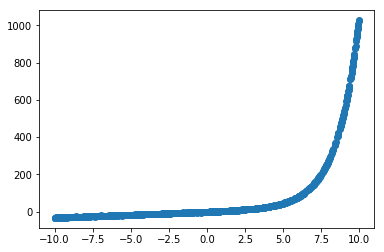

In [31]:
plt.scatter(x_for_visual,y_for_visual)

In [33]:
Variable(x)

tensor([[ 1.6112e+00],
        [-7.2711e+00],
        [ 1.3084e+00],
        [ 6.0004e+00],
        [-9.1288e+00],
        [-4.4831e+00],
        [ 6.3370e+00],
        [-3.2451e+00],
        [-8.6335e+00],
        [-8.0835e+00],
        [ 2.3673e+00],
        [-6.6128e+00],
        [-6.0775e+00],
        [ 6.3490e+00],
        [ 3.4950e+00],
        [-7.7616e+00],
        [ 4.3406e+00],
        [ 1.6168e+00],
        [-1.4737e-01],
        [-8.7737e+00],
        [-3.8057e+00],
        [ 6.6577e+00],
        [-5.9506e+00],
        [-8.4004e+00],
        [-4.5198e+00],
        [ 1.9418e+00],
        [-9.5579e+00],
        [-9.9292e+00],
        [ 1.1483e+00],
        [-3.9950e+00],
        [ 6.0248e+00],
        [ 7.1791e+00],
        [-8.5214e-01],
        [ 4.8195e+00],
        [ 2.8721e+00],
        [-2.7552e+00],
        [-2.8960e+00],
        [ 8.0138e+00],
        [-4.4895e+00],
        [-1.5735e+00],
        [-5.1617e+00],
        [-6.4142e+00],
        [-7.1690e-01],
        [-2

In [34]:
for i in range(1000):

    
    model.zero_grad()
    y_pred = model(Variable(x))
    # 모델 통과해서 output나오는 부분
    # output과 label모두 Variable로 감싸줘야함
    loss = criterion(y_pred, y_noise)
    loss.backward()
    
    # 계산된 gradient를 기반으로 optimizer를 이용해 w와 b를 update
    optimizer.step()
    
    if i % 200 ==0:
        print(loss) # loss가 줄어들지 않는다. 

tensor(43680.7422, grad_fn=<MseLossBackward>)
tensor(22780.0391, grad_fn=<MseLossBackward>)
tensor(22780.0391, grad_fn=<MseLossBackward>)
tensor(22780.0391, grad_fn=<MseLossBackward>)
tensor(22780.0391, grad_fn=<MseLossBackward>)


## 새로운 모델을 만들어보자

In [35]:
## fully connected model with 2 hidden layer
## nn.Sequential : 여러개의 층을 하나의 모델로 묶을 수 있다. 
model = nn.Sequential(
        nn.Linear(1,6),
        nn.ReLU(),
        nn.Linear(6,10),
        nn.ReLU(),
        nn.Linear(10,1)
        )
## Layer를 깊게 가질수록 line이 부드러워진다. 

criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = 0.005)

In [36]:
for i in range(10000):

    
    model.zero_grad()
    y_pred = model(Variable(x))

    loss = criterion(y_pred, y_noise)
    loss.backward()
    

    optimizer.step()
    
    if i % 200==0:
        print(loss)  # Loss가 떨어진다.

tensor(92.7573, grad_fn=<L1LossBackward>)
tensor(58.2303, grad_fn=<L1LossBackward>)
tensor(55.0383, grad_fn=<L1LossBackward>)
tensor(49.0354, grad_fn=<L1LossBackward>)
tensor(38.8458, grad_fn=<L1LossBackward>)
tensor(28.5667, grad_fn=<L1LossBackward>)
tensor(24.7187, grad_fn=<L1LossBackward>)
tensor(22.9251, grad_fn=<L1LossBackward>)
tensor(21.5041, grad_fn=<L1LossBackward>)
tensor(19.9215, grad_fn=<L1LossBackward>)
tensor(19.9761, grad_fn=<L1LossBackward>)
tensor(18.0881, grad_fn=<L1LossBackward>)
tensor(18.2134, grad_fn=<L1LossBackward>)
tensor(17.2651, grad_fn=<L1LossBackward>)
tensor(16.8301, grad_fn=<L1LossBackward>)
tensor(16.2781, grad_fn=<L1LossBackward>)
tensor(16.7340, grad_fn=<L1LossBackward>)
tensor(15.2118, grad_fn=<L1LossBackward>)
tensor(14.3960, grad_fn=<L1LossBackward>)
tensor(13.8449, grad_fn=<L1LossBackward>)
tensor(13.6709, grad_fn=<L1LossBackward>)
tensor(14.7308, grad_fn=<L1LossBackward>)
tensor(13.2829, grad_fn=<L1LossBackward>)
tensor(13.3170, grad_fn=<L1LossBac